# Data Analysis- Section2

## 1.  Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## 2. Read Dataset

In [41]:
df = pd.read_csv('employee.csv')
df.head()

,title,dept,salary,race,gender,hire_date
0,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Male,2015-02-03
1,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Male,1982-02-08
2,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614.0,Black,Male,1984-11-26
3,ENGINEER,Public Works & Engineering-PWE,71680.0,Asian,Male,2012-03-26
4,CARPENTER,Houston Airport System (HAS),42390.0,White,Male,2013-11-04


In [42]:
1- Female/male variations?
2- Race distribution? 
3- Slary vs Race?
4- Salary vs Gender?


SyntaxError: invalid syntax (<ipython-input-42-f47d7ddb9fac>, line 2)

## 3. Explore Data

### 3.1 Rows and Columns

In [3]:
df.shape

(1653, 6)

### 3.2 Data Types for each feature

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 6 columns):
title        1653 non-null object
dept         1653 non-null object
salary       1551 non-null float64
race         1633 non-null object
gender       1653 non-null object
hire_date    1653 non-null object
dtypes: float64(1), object(5)
memory usage: 77.6+ KB


### 3.3 Null values for columns!

In [5]:
len(df[df['title'].isnull()])

0

In [6]:
len(df[df['dept'].isnull()])

0

In [7]:
len(df[df['salary'].isnull()])

102

In [8]:
len(df[df['race'].isnull()])

20

In [11]:
df[df['race'].isnull()]

,title,dept,salary,race,gender,hire_date
6,AIRPORT OPERATIONS COORDINATOR,Houston Airport System (HAS),44616.0,NaN,Male,2016-03-14
27,FIRE FIGHTER TRAINEE,Houston Fire Department (HFD),28024.0,NaN,Male,2016-03-14
270,COMMUNITY RELATIONS SPECIALIST,Health & Human Services,NaN,NaN,Female,2016-05-23
380,FIRE FIGHTER TRAINEE,Houston Fire Department (HFD),28024.0,NaN,Male,2016-03-28
398,IT LEAD - CLIENT SUPPORT,Houston Airport System (HAS),80002.0,NaN,Male,2016-02-01
403,LICENSED VOCATIONAL NURSE,Health & Human Services,49400.0,NaN,Female,2016-02-08
456,POLICE TRAINEE,Houston Police Department-HPD,42000.0,NaN,Male,2016-02-08
519,RECREATION SPECIALIST,Parks & Recreation,28808.0,NaN,Male,2016-02-29
575,POLICE TRAINEE,Houston Police Department-HPD,42000.0,NaN,Male,2016-02-08
634,PARK MAINTENANCE AIDE,Parks & Recreation,NaN,NaN,Male,2016-04-04


In [9]:
len(df[df['gender'].isnull()])

0

In [10]:
len(df[df['hire_date'].isnull()])

0

### 3.4 How to deal with nulls
1. Fill them!
2. Remove them.

For Salary
we can fill it with :

    1- Mean.
    2- Median.
Look at the distribution for more intelligent fill-up!

In [12]:
df['salary'].fillna(np.mean, inplace = True)

In [13]:
len(df[df['salary'].isnull()])

0

For Race
we can fill it with :

    1- Take the Mode.
Look at the distribution for more intelligent fill-up!

In [14]:
df['race'].fillna(df['race'].mode()[0], inplace = True)

In [15]:
len(df[df['race'].isnull()])

0

### 3.5 discover relationships in data!

#### 3.5.1 Value_Counts

In [16]:
df['race'].value_counts()

White              620
Black              542
Hispanic           395
Asian               88
Native American      8
Name: race, dtype: int64

In [17]:
df['dept'].value_counts()

Houston Police Department-HPD     638
Houston Fire Department (HFD)     384
Public Works & Engineering-PWE    343
Health & Human Services           108
Houston Airport System (HAS)      106
Parks & Recreation                 74
Name: dept, dtype: int64

In [18]:
df['gender'].value_counts()

Male      1228
Female     425
Name: gender, dtype: int64

#### 3.5.2 Groupby!

In [60]:
new_df=df.groupby('gender')['salary'].sum().reset_index()

,gender,salary
0,Female,20631116.0
1,Male,66372188.0


In [66]:
df.groupby('gender').agg({'salary': 'mean', 'race': 'count'}).reset_index()

,gender,salary,race
0,Female,50815.556650,417
1,Male,57966.976419,1216


In [69]:
df.groupby(['race', 'gender']).agg({'salary':['mean','count']}).reset_index()

race  gender        salary      
                                    mean count
0            Asian  Female  58304.222222    18
1            Asian    Male  60622.956522    69
2            Black  Female  48133.381643   207
3            Black    Male  51853.000000   311
4         Hispanic  Female  44216.960000   100
5         Hispanic    Male  55493.064057   281
6  Native American  Female  58844.333333     3
7  Native American    Male  68850.500000     4
8            White  Female  66415.527778    72
9            White    Male  63439.195745   470

#### 3.5.3 Date Manipulation

In [28]:
df['hire_date']= pd.to_datetime(df['hire_date'])

In [30]:
df['hire_year']= df['hire_date'].dt.year

In [31]:
df['hire_month']= df['hire_date'].dt.month

In [32]:
df['hire_day']= df['hire_date'].dt.day

In [33]:
df.head()

,title,dept,salary,race,gender,hire_date,hire_year,hire_month,hire_day
0,POLICE OFFICER,Houston Police Department-HPD,45279,White,Male,2015-02-03,2015,2,3
1,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166,White,Male,1982-02-08,1982,2,8
2,SENIOR POLICE OFFICER,Houston Police Department-HPD,66614,Black,Male,1984-11-26,1984,11,26
3,ENGINEER,Public Works & Engineering-PWE,71680,Asian,Male,2012-03-26,2012,3,26
4,CARPENTER,Houston Airport System (HAS),42390,White,Male,2013-11-04,2013,11,4


In [34]:
df['hire_year'].sort_values()

55      1958
1207    1968
481     1971
1138    1972
252     1974
        ... 
208     2016
1565    2016
1472    2016
188     2016
323     2016
Name: hire_year, Length: 1653, dtype: int64

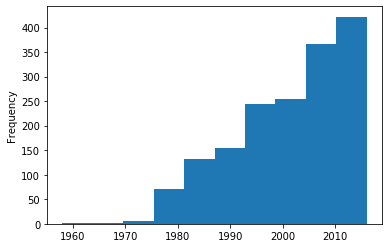

In [35]:
df['hire_year'].plot(kind='hist')

In [36]:
year_condition=  (df['hire_year']>=2010) & (df['hire_year']<2020)
df_recent= df[year_condition]
df_recent.head()

,title,dept,salary,race,gender,hire_date,hire_year,hire_month,hire_day
0,POLICE OFFICER,Houston Police Department-HPD,45279,White,Male,2015-02-03,2015,2,3
3,ENGINEER,Public Works & Engineering-PWE,71680,Asian,Male,2012-03-26,2012,3,26
4,CARPENTER,Houston Airport System (HAS),42390,White,Male,2013-11-04,2013,11,4
6,AIRPORT OPERATIONS COORDINATOR,Houston Airport System (HAS),44616,White,Male,2016-03-14,2016,3,14
9,CUSTOMER SERVICE REPRESENTATIVE I,Public Works & Engineering-PWE,30347,Black,Male,2015-11-16,2015,11,16


In [38]:
df_recent.groupby(['hire_year','race', 'gender']).agg({'salary':'mean'})

In [ ]:
df_recent.groupby(['race','hire_year', 'gender']).agg({'salary':'mean'}).reset_index()

### 3.6 Plot

#### 3.6.1 What is Salary distribution?

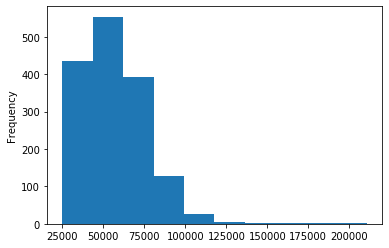

In [44]:
df['salary'].plot(kind='hist')

In [45]:
df['salary'].describe()

count      1551.000000
mean      56094.973565
std       20346.103280
min       24960.000000
25%       41932.500000
50%       55461.000000
75%       66614.000000
max      210588.000000
Name: salary, dtype: float64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 9 columns):
title         1653 non-null object
dept          1653 non-null object
salary        1653 non-null object
race          1653 non-null object
gender        1653 non-null object
hire_date     1653 non-null datetime64[ns]
hire_year     1653 non-null int64
hire_month    1653 non-null int64
hire_day      1653 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 116.4+ KB


#### 3.6.1 What is Race distribution?

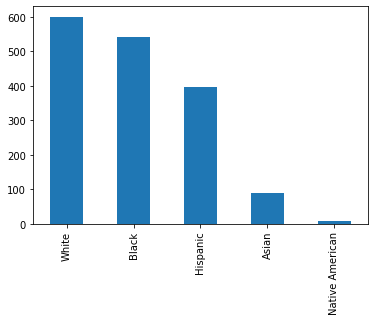

In [47]:
df['race'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Count')

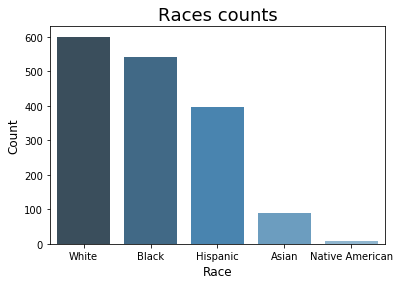

In [54]:
race_df = df['race'].value_counts().reset_index()
race_df.head()
sns.barplot(x='index', y='race', data = race_df ,palette="Blues_d")
plt.title('Races counts', fontsize=18)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)

#### 3.6.3 What is Gender distribution in dataset?

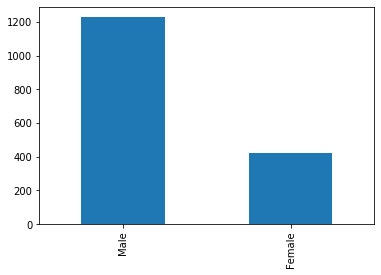

In [48]:
df['gender'].value_counts().plot(kind='bar')

### TODO Activity

1- Female/male variations?

Text(0, 0.5, 'Count')

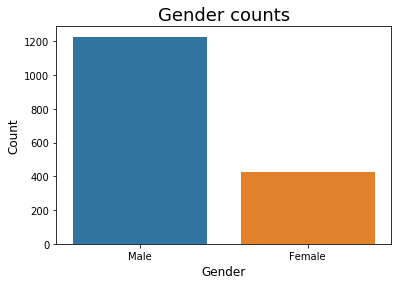

In [71]:
gender_df= df['gender'].value_counts().reset_index()
sns.barplot(x='index', y='gender', data = gender_df )
plt.title('Gender counts', fontsize=18)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

2- Race distribution? 

Text(0, 0.5, 'Count')

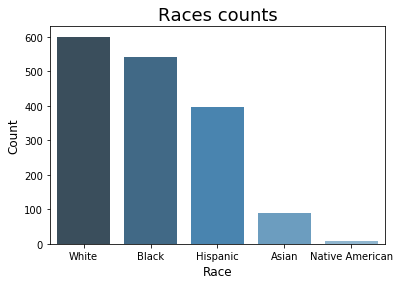

In [72]:
race_df = df['race'].value_counts().reset_index()
race_df.head()
sns.barplot(x='index', y='race', data = race_df ,palette="Blues_d")
plt.title('Races counts', fontsize=18)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Count', fontsize=12)

3- Salary vs Race?

In [84]:
salary_race_df= df.groupby('race').agg({'salary': ['mean', 'count']}).reset_index()
salary_race_df.columns= ['race', 'avg_salary', 'Number_of_employees']
salary_race_df

,race,avg_salary,Number_of_employees
0,Asian,60143.218391,87
1,Black,50366.588803,518
2,Hispanic,52533.456693,381
3,Native American,64562.142857,7
4,White,63834.575646,542


Text(0, 0.5, 'Avg Salary')

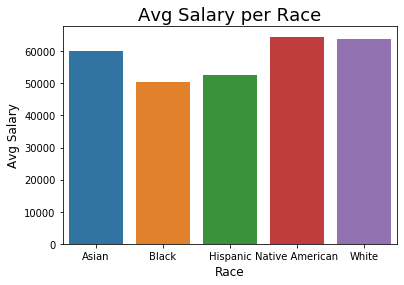

In [85]:
sns.barplot(x='race', y='avg_salary', data = salary_race_df )
plt.title('Avg Salary per Race', fontsize=18)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Avg Salary', fontsize=12)

Text(0, 0.5, 'Employees count')

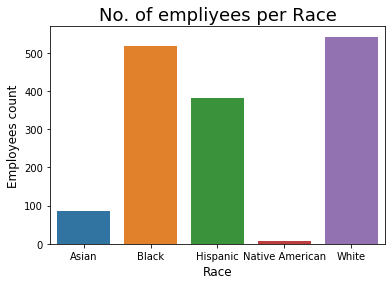

In [86]:
sns.barplot(x='race', y='Number_of_employees', data = salary_race_df )
plt.title('No. of empliyees per Race', fontsize=18)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Employees count', fontsize=12)

In [99]:
'''# Native American Salaries distribution
native_american_df= df[df['race']== 'Native American']
sns.distplot(df['salary'],kde= False )
plt.title('Distrribution of Native American salaries', fontsize=18)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Count', fontsize=12)'''

"# Native American Salaries distribution\nnative_american_df= df[df['race']== 'Native American']\nsns.distplot(df['salary'],kde= False )\nplt.title('Distrribution of Native American salaries', fontsize=18)\nplt.xlabel('Salary', fontsize=12)\nplt.ylabel('Count', fontsize=12)"

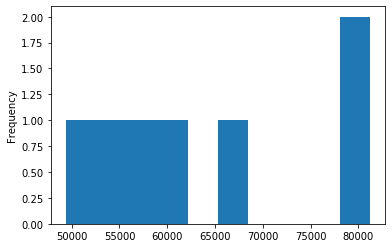

In [100]:
native_american_df['salary'].plot(kind='hist')

4- Salary vs Gender?

In [87]:
salary_gander_df= df.groupby('gender').agg({'salary': ['mean', 'count']}).reset_index()
salary_gander_df.columns= ['gender', 'avg_salary', 'Number_of_employees']
salary_gander_df

,gender,avg_salary,Number_of_employees
0,Female,50815.556650,406
1,Male,57966.976419,1145


Text(0, 0.5, 'Avg Salary')

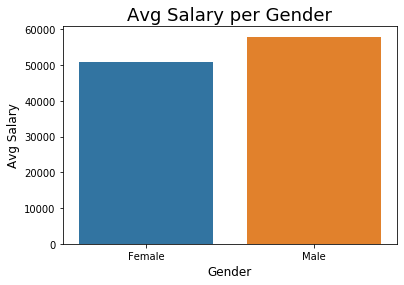

In [88]:
sns.barplot(x='gender', y='avg_salary', data = salary_gander_df )
plt.title('Avg Salary per Gender', fontsize=18)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Avg Salary', fontsize=12)

Text(0, 0.5, 'Employees count')

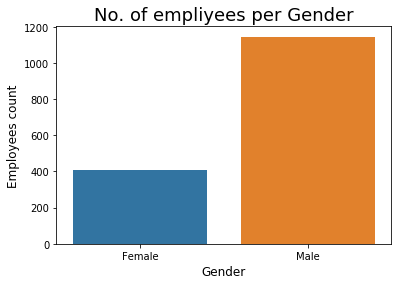

In [90]:
sns.barplot(x='gender', y='Number_of_employees', data = salary_gander_df )
plt.title('No. of empliyees per Gender', fontsize=18)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Employees count', fontsize=12)

## 4. Questions:
1- Salary distribution per gender?
2- Salary distribution per race?
3- Gender per Race?
4- What are races that get paid better than others?
5- What month do companies normally hire?
6- What can we say from the hire_year distribution (Histogram) ?
7- What races has more female hired in positions
8- salary vs title?
9- title vs gender?
10- title vs race?
11- race-> gender salary?
12- gender vs year?
13- race vs year?
14- distribution hire_date month?